<a href="https://colab.research.google.com/github/altsemprojectk242/Force-Prediction-of-Prosthetic-Hand/blob/main/Final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
from scipy.signal import butter, filtfilt,lfilter
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
emg_data=pd.read_csv('/content/drive/MyDrive/sEMG data.csv',header=None)

In [5]:
force_data=pd.read_csv('/content/drive/MyDrive/forcedata_10.csv',header=None)

In [ ]:
emg_data.head()

In [6]:
acc_data=pd.read_csv('/content/drive/MyDrive/accdata_10.csv',header=None)

In [ ]:
acc_data.head()

In [7]:
def apply_bandpass_filter(data, fs=500, lowcut=15, highcut=200):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    # b, a = butter(6, [low, high], btype='band')
    # padded_data = np.pad(data, (39, 39), mode='reflect')
    # filtered_data = filtfilt(b, a, padded_data)
    # return filtered_data[39:-39]  # Remove the padded data
    b, a = butter(6, [low, high], btype='band')
    filtered_data = lfilter(b, a, data)
    return filtered_data

In [8]:
emg_df=pd.DataFrame(apply_bandpass_filter(emg_data))

In [9]:
def apply_notch_filter(data, fs=500, notch_freq=50):
    nyquist = 0.5 * fs
    notch = notch_freq / nyquist
    b, a = butter(2, [notch - 0.01, notch + 0.01], btype='bandstop')
    filtered_data = filtfilt(b, a, data,padlen=1)
    return filtered_data

In [10]:
emg_df=pd.DataFrame(apply_notch_filter(emg_df))

In [11]:
emg_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-3.365707e-06,-5.714813e-06,0.000002,0.000009,4.671823e-06,0.000001,-3.146900e-06,-0.000007,1.590383e-06,3.183470e-06,-4.628726e-07,-0.000007
1,-5.072910e-06,-1.004519e-05,0.000005,0.000017,2.610309e-06,0.000001,9.852296e-07,-0.000009,-8.650078e-07,3.219804e-06,-1.470013e-06,-0.000008
2,-6.019092e-06,-1.321568e-05,0.000007,0.000021,7.698446e-07,0.000002,4.539018e-06,-0.000010,-2.942691e-06,7.438121e-07,-6.684902e-07,-0.000007
3,-4.324585e-06,-1.008690e-05,0.000006,0.000014,-1.341284e-06,0.000003,3.264734e-06,-0.000008,-2.142940e-07,-1.188826e-06,-1.285413e-07,-0.000001
4,-5.463357e-07,-8.236241e-07,0.000004,-0.000002,-6.603678e-06,0.000005,2.969260e-07,-0.000004,4.515699e-06,-1.224550e-06,-3.815340e-07,0.000006


In [12]:
acc_data-= acc_data.mean(axis=0)

In [13]:
acc_df = pd.DataFrame(apply_notch_filter(acc_data))

In [14]:
acc_data.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.000883,-0.000607,-0.012576,-0.039076,-0.095376,0.062961,-0.017196,-0.020803,0.004242,-0.000379,...,0.005018,-0.010207,0.027852,0.000356,-0.004198,-0.011286,0.026494,0.015020,-0.012326,0.022486
1,-0.000883,-0.000607,-0.012576,-0.040253,-0.095376,0.062961,-0.017196,-0.020803,0.004242,-0.000379,...,0.005018,-0.010207,0.029013,0.000356,-0.004198,-0.011286,0.026494,0.016199,-0.012326,0.022486
2,-0.000883,-0.000607,-0.012576,-0.040540,-0.095376,0.062961,-0.018081,-0.020803,0.003344,-0.000379,...,0.004105,-0.011068,0.029297,0.000356,-0.004198,-0.011286,0.026494,0.015596,-0.013190,0.022486
3,-0.000883,-0.000607,-0.012576,-0.040540,-0.095376,0.062961,-0.019251,-0.020803,0.002157,-0.000379,...,0.002898,-0.012206,0.029297,0.000356,-0.004198,-0.011286,0.026494,0.014417,-0.014334,0.022486
4,-0.000883,-0.000607,-0.012576,-0.040540,-0.095376,0.062961,-0.020422,-0.020803,0.000969,-0.000379,...,0.001690,-0.013344,0.029297,0.000356,-0.004198,-0.011286,0.026494,0.013238,-0.015478,0.022486


In [15]:
def segment_data(data, window_length=500):
    num_samples = len(data)
    #num_windows = int(np.floor((num_samples - window_length) / increment)) + 1
    num_windows=num_samples//window_length
    windows=[]
    for i in range(num_windows):
      start_idx = i * window_length
      end_idx = (i + 1) * window_length
      window = data.iloc[start_idx:end_idx]
      windows.append(window)

    # num_channels = data.shape[1]
    # segmented_data = np.zeros((num_windows, window_length,num_channels))
    return windows


In [16]:
emg_seg=segment_data(emg_df)

In [17]:
np.shape(emg_seg)

(20, 500, 12)

In [ ]:
print(emg_seg)

In [18]:
acc_seg=segment_data(acc_df)
np.shape(acc_seg)

(20, 500, 36)

In [19]:
from scipy.stats import skew
# from scipy.integrate import simps
def zc(data,mav):
        cross = 0
        for x,y in zip(data[::],data[1::]):
                if x > mav and y < mav:
                        cross +=1
                elif y > mav and x < mav:
                        cross +=1
        return int(cross)
# Define a function to compute slope sign change
def slope_sign_change(signal):
    diffs = np.diff(signal)
    return (diffs[:-1] * diffs[1:] < 0).sum()

# Define a function to compute wavelength
def wavelength(signal):
    return np.sum(np.abs(np.diff(signal)))
def wilson_amplitude(signal):
    x = abs(np.diff(signal))
    th=np.mean(signal) + 3 * np.std(signal)
    umbral = x >= th
    return np.sum(umbral)

In [20]:
feature_names = ['mav', 'rms', 'zc', 'ssc', 'wavelength', 'var', 'iemg', 'skewness', 'wamp']

# Initialize an empty dataframe to store the feature values
features_df = pd.DataFrame(columns=feature_names)

In [21]:
all_features=[]
for i in range(len(emg_seg)):
  window_data=emg_seg[i]
  for channel in range(window_data.shape[1]):
    channel_data = window_data.iloc[:, channel]
    # Compute features for the current channel
    mav_value = np.mean(np.abs(channel_data))
    rms_value = np.sqrt(np.mean(channel_data**2))
    zero_crossing_value = zc(channel_data,mav_value)
    slope_sign_change_value = slope_sign_change(channel_data)
    wavelength_value = wavelength(channel_data)
    variance_value = np.var(channel_data)
    integrated_emg_value = np.sum(abs(channel_data))
    skewness_value = skew(channel_data)
    wilson_amplitude_value = wilson_amplitude(channel_data)
    all_features.append([i, channel, mav_value, rms_value, zero_crossing_value, slope_sign_change_value,
                             wavelength_value, variance_value, integrated_emg_value, skewness_value, wilson_amplitude_value])

# Convert the list to a DataFrame
columns = ['Window', 'Channel', 'MAV', 'RMS', 'Zero Crossing', 'Slope Sign Change', 'Wavelength', 'Variance',
           'Integrated EMG', 'Skewness', 'Wilson Amplitude']
features_df = pd.DataFrame(all_features, columns=columns)



In [22]:
features_df

,Window,Channel,MAV,RMS,Zero Crossing,Slope Sign Change,Wavelength,Variance,Integrated EMG,Skewness,Wilson Amplitude
0,0,0,0.000002,0.000002,32,138,0.000398,5.774347e-12,0.000789,0.945868,4
1,0,1,0.000003,0.000006,34,162,0.000948,3.969285e-11,0.001479,0.535482,8
2,0,2,0.000002,0.000003,45,154,0.000547,1.011637e-11,0.001037,-1.039433,1
3,0,3,0.000005,0.000010,33,150,0.001603,1.029670e-10,0.002543,-0.624512,6
4,0,4,0.000004,0.000005,55,148,0.001001,2.721729e-11,0.001781,0.356479,0
...,...,...,...,...,...,...,...,...,...,...,...
235,19,7,0.000021,0.000030,42,121,0.004023,8.708827e-10,0.010557,-1.350752,0
236,19,8,0.000026,0.000035,50,133,0.006290,1.259065e-09,0.012993,-0.853470,0
237,19,9,0.000028,0.000037,41,115,0.005412,1.386358e-09,0.013862,0.873272,0
238,19,10,0.000036,0.000049,44,131,0.008098,2.390151e-09,0.017871,0.815249,0


In [23]:
acc_features=[]
# Define the names of the features
feature_names = ['mean_x', 'mean_y', 'mean_z']
for i in range(len(acc_seg)):
  window_data=acc_seg[i]
  # Iterate over each channel in the acc data
  x=0
  channel=0
  for x in range(0,window_data.shape[1],3):
    mean_x_v = np.mean(window_data.iloc[:, x])
    y=x+1
    mean_y_v = np.mean(window_data.iloc[:, y])
    z=x+2
    mean_z_v = np.mean(window_data.iloc[:, z])
  # Append the feature values to the dataframe
    acc_features.append([i, channel, mean_x_v,mean_y_v,mean_z_v])
    channel+=1
# Convert the list to a DataFrame
columns = ['Window', 'Channel', 'Mean_x','Mean_y','Mean_z']
features_df2 = pd.DataFrame(acc_features, columns=columns)


In [24]:
features_df2

,Window,Channel,Mean_x,Mean_y,Mean_z
0,0,0,-0.010407,0.000787,-0.007984
1,0,1,-0.027893,-0.085694,0.068595
2,0,2,-0.029851,-0.028595,-0.014102
3,0,3,-0.009663,0.003091,0.008106
4,0,4,-0.019116,0.019584,-0.039210
...,...,...,...,...,...
235,19,7,-0.001511,0.019309,0.023409
236,19,8,-0.000673,0.000026,0.000971
237,19,9,0.009412,-0.003703,0.003810
238,19,10,0.002886,0.003322,-0.008343


In [25]:
mergedfeature_df = pd.merge(features_df, features_df2, on=['Window', 'Channel'])
mergedfeature_df

,Window,Channel,MAV,RMS,Zero Crossing,Slope Sign Change,Wavelength,Variance,Integrated EMG,Skewness,Wilson Amplitude,Mean_x,Mean_y,Mean_z
0,0,0,0.000002,0.000002,32,138,0.000398,5.774347e-12,0.000789,0.945868,4,-0.010407,0.000787,-0.007984
1,0,1,0.000003,0.000006,34,162,0.000948,3.969285e-11,0.001479,0.535482,8,-0.027893,-0.085694,0.068595
2,0,2,0.000002,0.000003,45,154,0.000547,1.011637e-11,0.001037,-1.039433,1,-0.029851,-0.028595,-0.014102
3,0,3,0.000005,0.000010,33,150,0.001603,1.029670e-10,0.002543,-0.624512,6,-0.009663,0.003091,0.008106
4,0,4,0.000004,0.000005,55,148,0.001001,2.721729e-11,0.001781,0.356479,0,-0.019116,0.019584,-0.039210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,19,7,0.000021,0.000030,42,121,0.004023,8.708827e-10,0.010557,-1.350752,0,-0.001511,0.019309,0.023409
236,19,8,0.000026,0.000035,50,133,0.006290,1.259065e-09,0.012993,-0.853470,0,-0.000673,0.000026,0.000971
237,19,9,0.000028,0.000037,41,115,0.005412,1.386358e-09,0.013862,0.873272,0,0.009412,-0.003703,0.003810
238,19,10,0.000036,0.000049,44,131,0.008098,2.390151e-09,0.017871,0.815249,0,0.002886,0.003322,-0.008343


In [26]:
from scipy.signal import resample
# Downsample the finger force signals to match the length of the feature matrix
def downsample_signals(data, target_length):
    # Reshape the data to have the repetitions as the last dimension
    data_reshaped = np.reshape(data, (-1, 1))

    # Downsample the signals
    data_downsampled = resample(data_reshaped, target_length)

    return data_downsampled

In [27]:
feature_matrix_length=len(mergedfeature_df)
y = downsample_signals(force_data, feature_matrix_length)

In [28]:
y.shape

(240, 1)

In [29]:
X=mergedfeature_df.drop(['Window', 'Channel'], axis=1)
X.shape

(240, 12)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (192, 12)
X_test shape: (48, 12)
y_train shape: (192, 1)
y_test shape: (48, 1)


# Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train.ravel());

In [ ]:
from sklearn import metrics
y_pred = regressor.predict(X_test)

# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
explained_variance = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
max_error = metrics.max_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Max Error: {max_error:.4f}")

# Decision Tree regressor

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtregressor=DecisionTreeRegressor()
dtregressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [33]:
from sklearn import metrics
y_pred = dtregressor.predict(X_test)

# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
explained_variance = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
max_error = metrics.max_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Max Error: {max_error:.4f}")

Mean Absolute Error (MAE): 0.9734
Mean Squared Error (MSE): 4.4234
Root Mean Squared Error (RMSE): 2.1032
Mean Absolute Percentage Error (MAPE): 1.1357
Explained Variance Score: 0.7643
R-squared (R²): 0.76
Max Error: 10.5402


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
y_pred = lin.predict(X_test)

# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
explained_variance = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
max_error = metrics.max_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Max Error: {max_error:.4f}")

# LightGBM

In [ ]:
import lightgbm as lgb
params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE',
    }
train_X = lgb.Dataset(X_train, label=y_train.ravel())
gbm = lgb.train(params, train_set=train_X, num_boost_round=3200)#, verbose_eval=100)

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
from sklearn.metrics import mean_squared_error
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

In [ ]:
# Calculate performance metrics
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
explained_variance = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
max_error = metrics.max_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Max Error: {max_error:.4f}")
#print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

# Support vector regressor

In [ ]:
from sklearn.svm import SVR
# Initialize the SVR model with a linear kernel
svr = SVR(kernel='poly', degree=3)

# Fit the model to the training data
svr.fit(X_train, y_train.ravel())

In [ ]:
# Make predictions
y_pred = svr.predict(X_test)
# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
explained_variance = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
max_error = metrics.max_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Max Error: {max_error:.4f}")

# XGBoost regression

In [ ]:
import xgboost as xgb

# Create an XGBoost regression model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Fit the model to the training data
model.fit(X_train, y_train)


In [ ]:
# Make predictions
y_pred = model.predict(X_test)
# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
explained_variance = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
max_error = metrics.max_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Max Error: {max_error:.4f}")

# SHAP

In [34]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.5 MB/s eta 0:00:00


In [35]:
import shap

In [36]:
features=X.columns.tolist()
print(features)

['MAV', 'RMS', 'Zero Crossing', 'Slope Sign Change', 'Wavelength', 'Variance', 'Integrated EMG', 'Skewness', 'Wilson Amplitude', 'Mean_x', 'Mean_y', 'Mean_z']


In [37]:
explainer = shap.TreeExplainer(dtregressor)
#shap_values = explainer(X_train)
shap_values1=explainer(X_test)

<Axes: xlabel='mean(|SHAP value|)'>

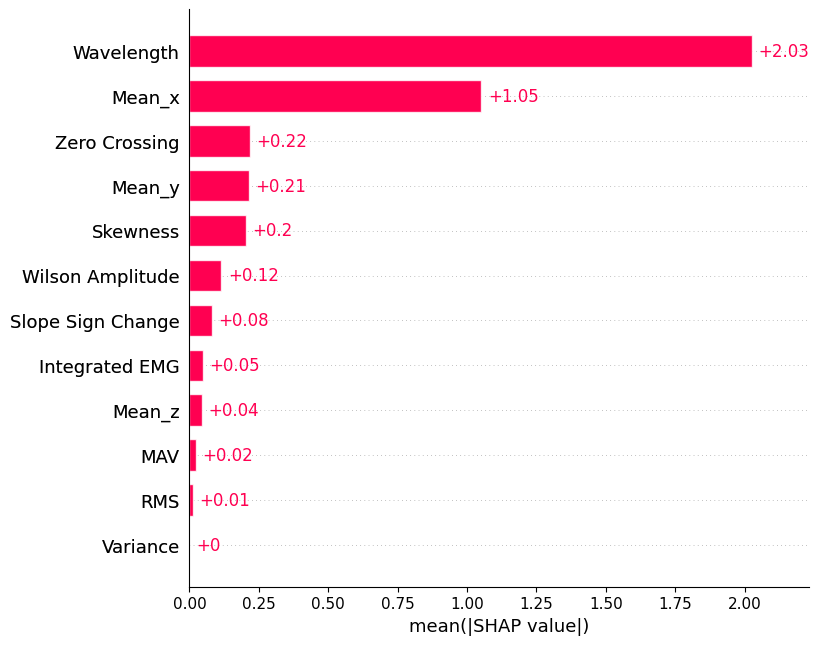

In [38]:
shap.plots.bar(shap_values1, max_display=99, show= False)


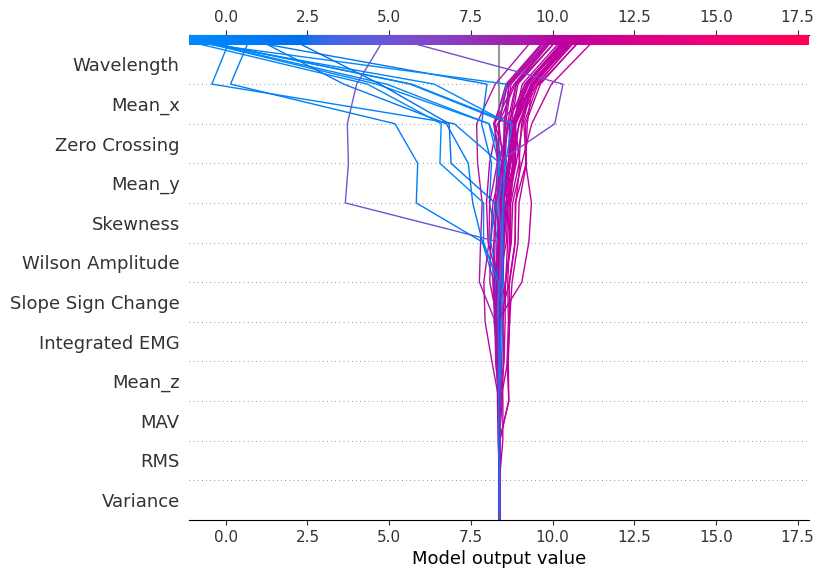

In [39]:
shap.decision_plot(explainer.expected_value, shap_values1.values,feature_names=features)

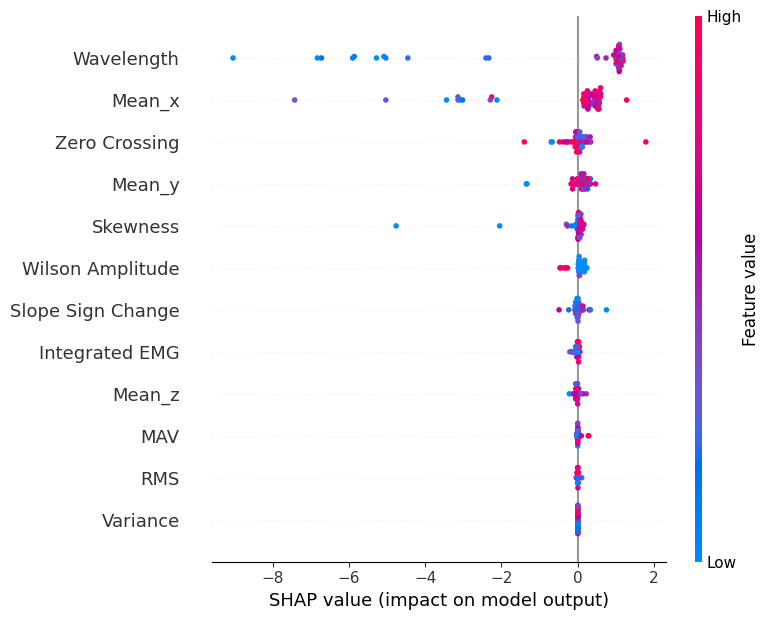

In [40]:
shap.summary_plot(shap_values1, X_test)

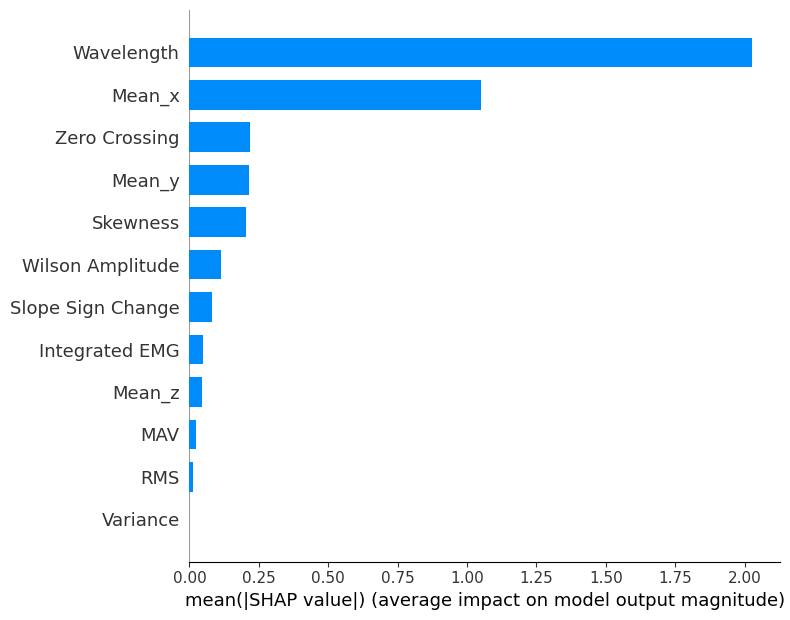

In [41]:
shap.summary_plot(shap_values1, X_test, plot_type="bar")

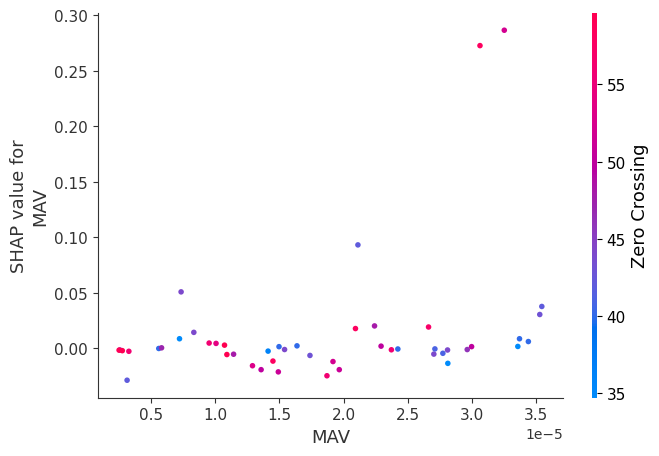

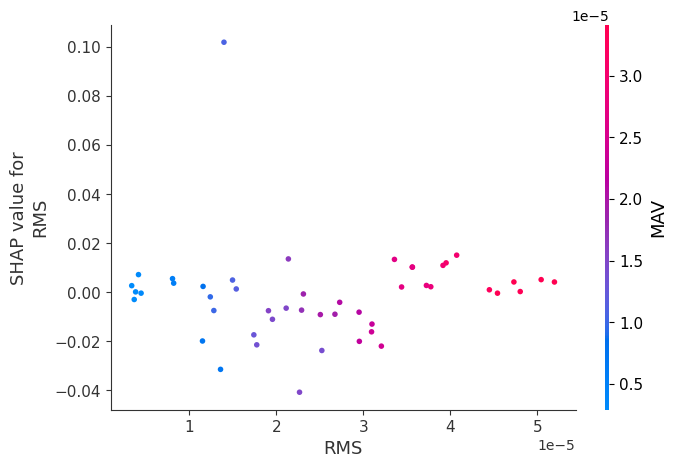

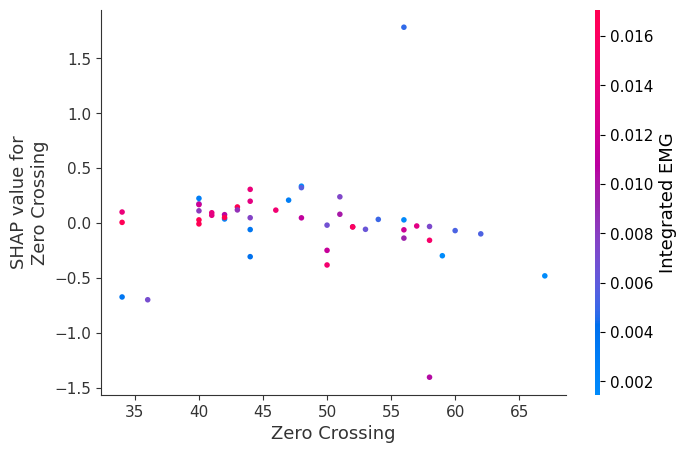

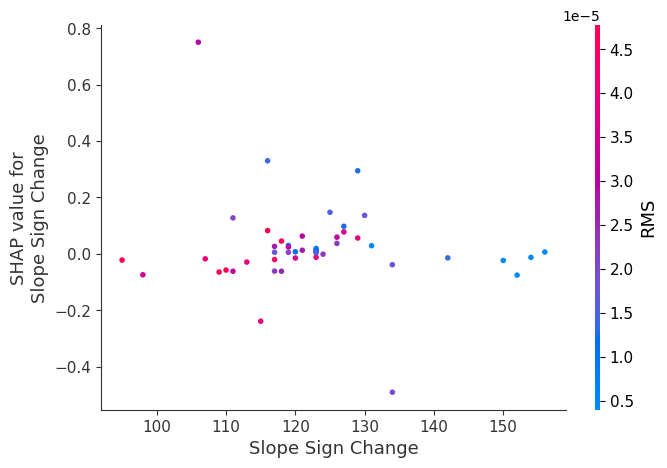

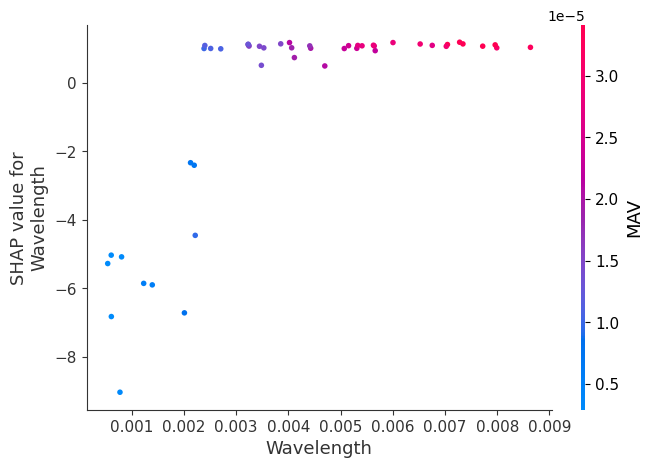

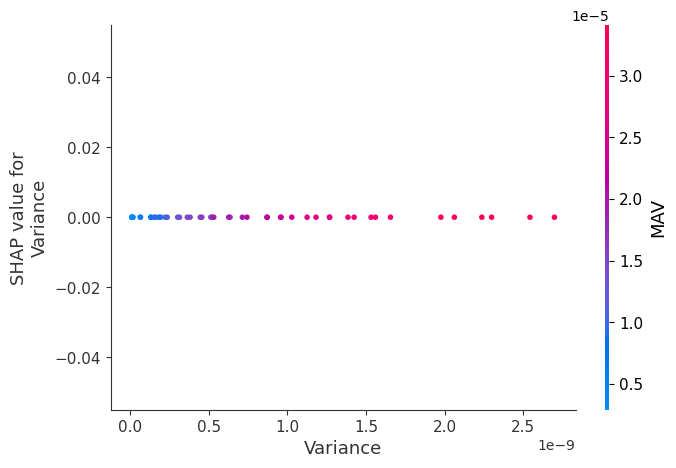

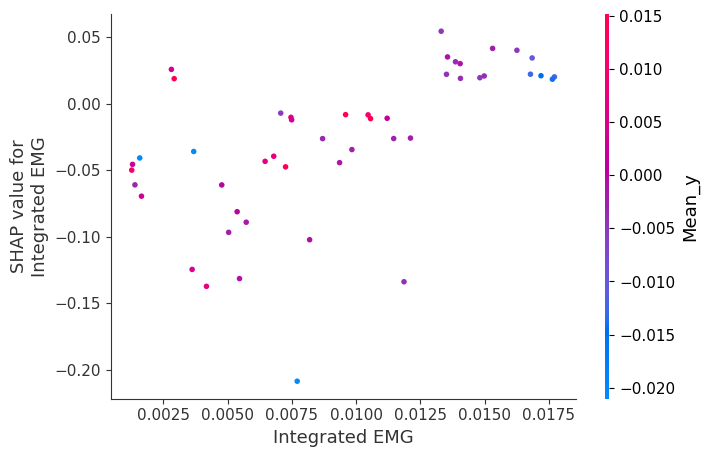

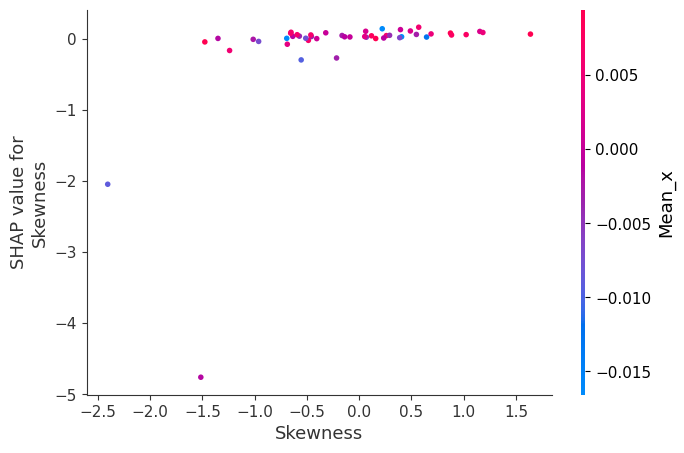

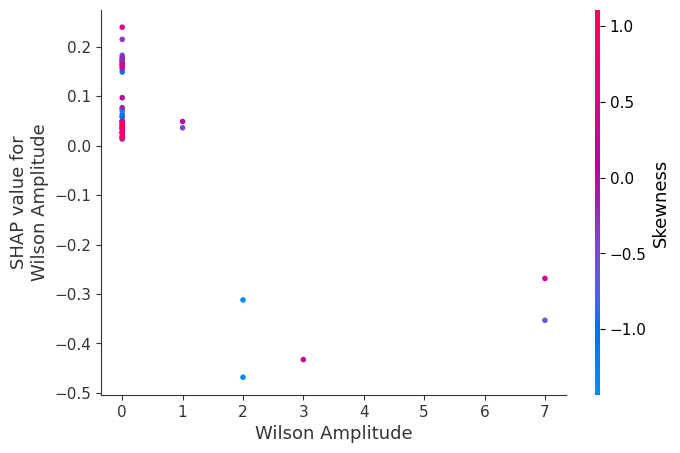

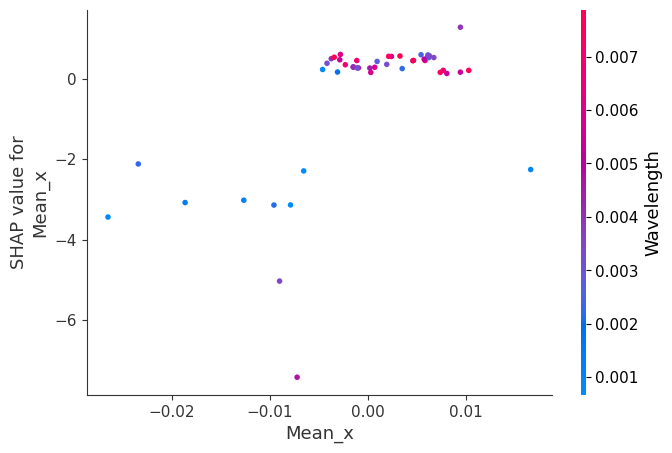

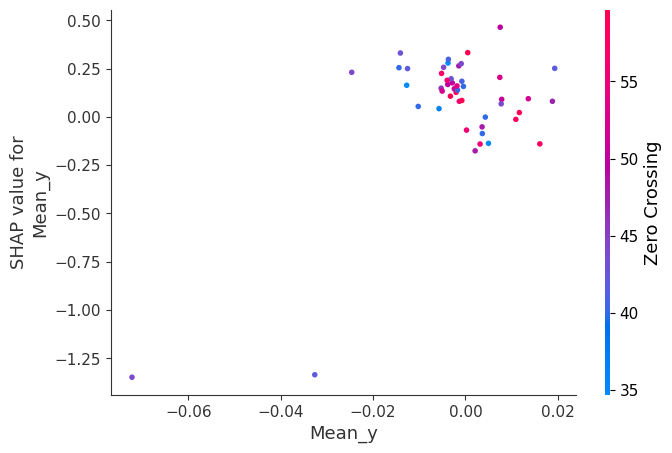

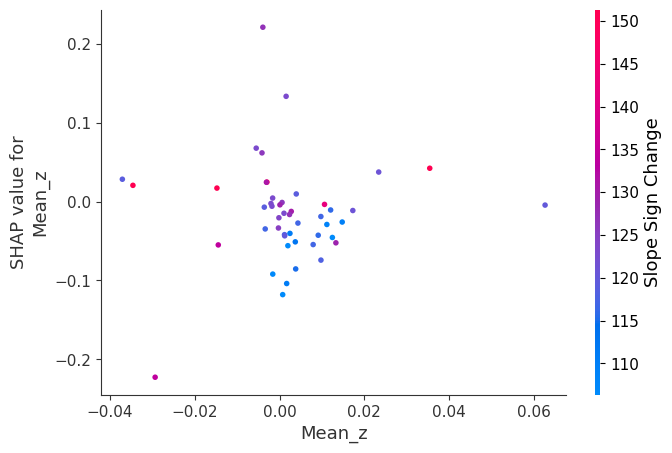

In [42]:
for name in X_test.columns:
    shap.dependence_plot(name, shap_values1.values, X_test)

In [ ]:
shap.initjs()

In [ ]:
shap.force_plot(
    explainer.expected_value, shap_values1.values[1, :], X_test.iloc[1, :])

In [ ]:
shap.force_plot(
    explainer.expected_value, shap_values.values[:100, :], X_train.iloc[:100, :]
)

# Results

In [ ]:
# X1=X.drop(['Zero Crossing', 'Variance','Mean_z','Skewness'], axis=1)
# X1

In [43]:
X1=X.drop(['Variance','MAV','Integrated EMG','Skewness'], axis=1)
X1

,RMS,Zero Crossing,Slope Sign Change,Wavelength,Wilson Amplitude,Mean_x,Mean_y,Mean_z
0,0.000002,32,138,0.000398,4,-0.010407,0.000787,-0.007984
1,0.000006,34,162,0.000948,8,-0.027893,-0.085694,0.068595
2,0.000003,45,154,0.000547,1,-0.029851,-0.028595,-0.014102
3,0.000010,33,150,0.001603,6,-0.009663,0.003091,0.008106
4,0.000005,55,148,0.001001,0,-0.019116,0.019584,-0.039210
...,...,...,...,...,...,...,...,...
235,0.000030,42,121,0.004023,0,-0.001511,0.019309,0.023409
236,0.000035,50,133,0.006290,0,-0.000673,0.000026,0.000971
237,0.000037,41,115,0.005412,0,0.009412,-0.003703,0.003810
238,0.000049,44,131,0.008098,0,0.002886,0.003322,-0.008343


In [44]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtregressor1=DecisionTreeRegressor()
dtregressor1.fit(X1_train,y_train)

DecisionTreeRegressor()

In [46]:
from sklearn import metrics
y_pred = dtregressor1.predict(X1_test)

# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
explained_variance = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
max_error = metrics.max_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Explained Variance Score: {explained_variance:.4f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Max Error: {max_error:.4f}")

Mean Absolute Error (MAE): 0.9414
Mean Squared Error (MSE): 3.9956
Root Mean Squared Error (RMSE): 1.9989
Mean Absolute Percentage Error (MAPE): 1.0945
Explained Variance Score: 0.7868
R-squared (R²): 0.78
Max Error: 10.5402


In [ ]:
explainer = shap.TreeExplainer(dtregressor1)
#shap_values = explainer(X_train)
shap_values2=explainer(X1_test)

In [ ]:
shap.summary_plot(shap_values2, X1_test)